## CHECKING TIFS

In [ ]:
from pyimpute import load_training_vector, load_targets, impute, evaluate_clf
from sklearn.svm import OneClassSVM
from sklearn.semi_supervised import LabelPropagation
import numpy as np
import matplotlib.pyplot as plt

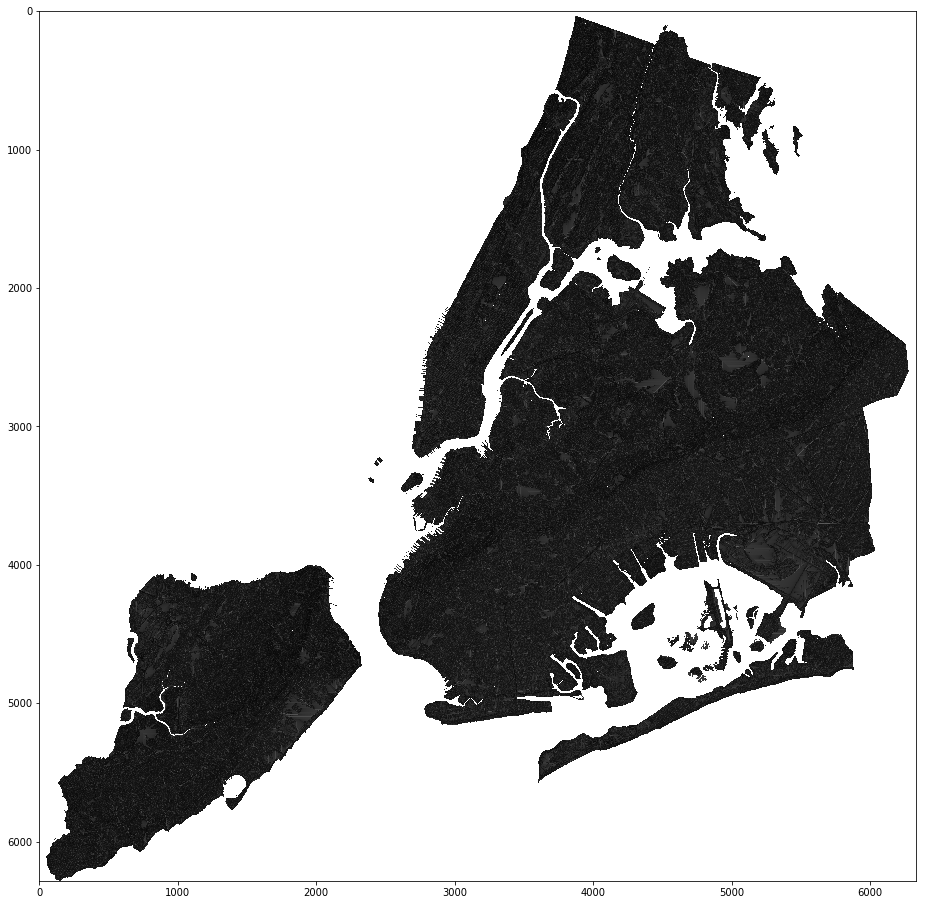

In [97]:
TWIarray = plt.imread('NYC_Topographic_Wetness.tif')
plt.figure(figsize=(16,16))
plt.imshow(TWIarray, cmap='gray_r')

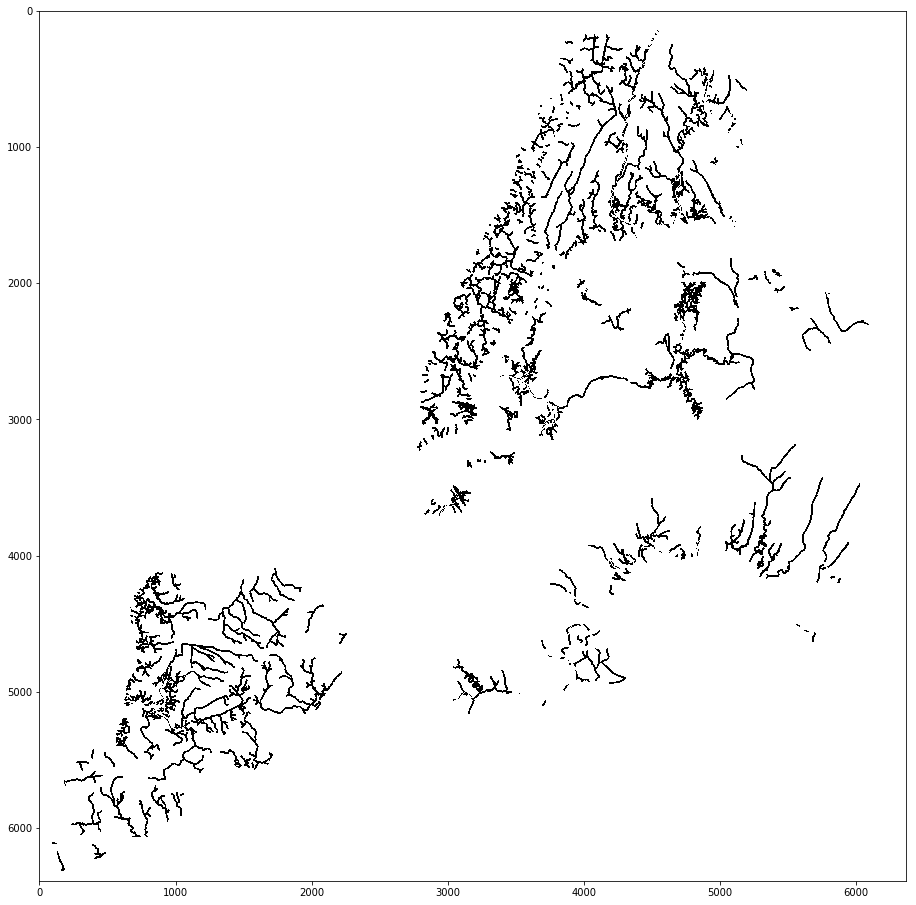

In [98]:
HWBarray = plt.imread('NYC_Historical_Water_Bodi.tif')
imarrayplot = np.where(HWBarray==255, 0, HWBarray)
plt.figure(figsize=(16,16))
plt.imshow(imarrayplot, cmap='gray_r')

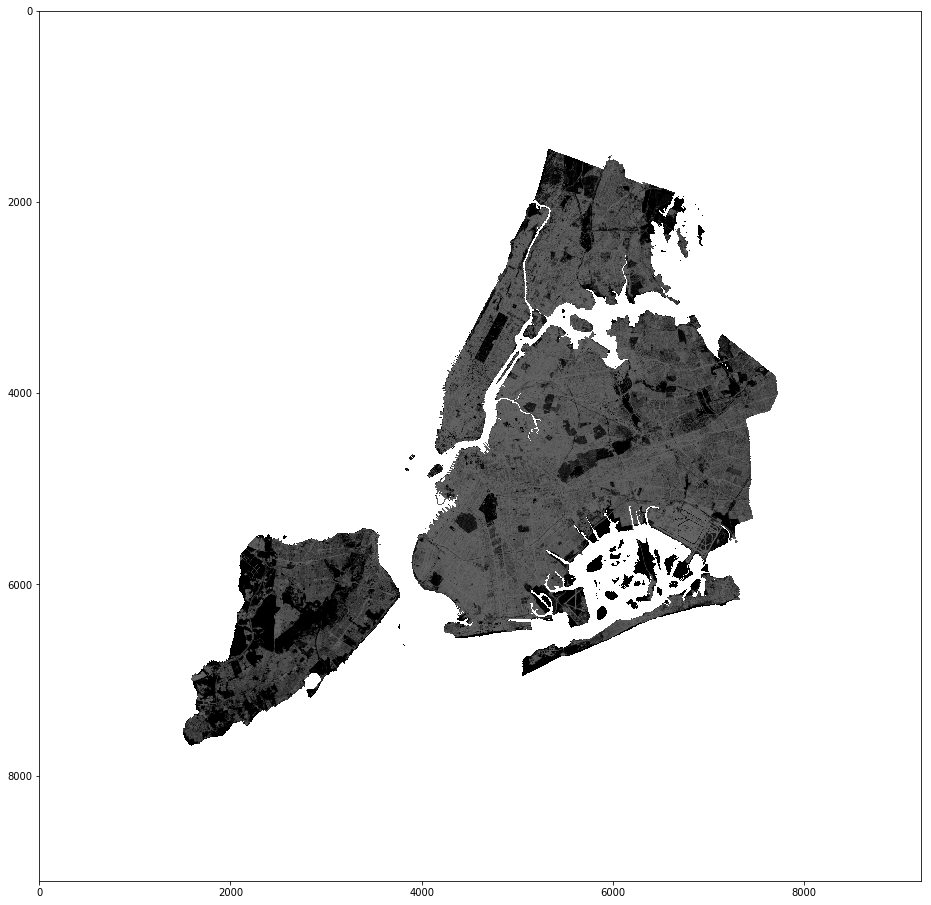

In [100]:
IMParray = plt.imread('NYC_Imperviousness.tif')
plt.figure(figsize=(16,16))
plt.imshow(IMParray, cmap='gray')

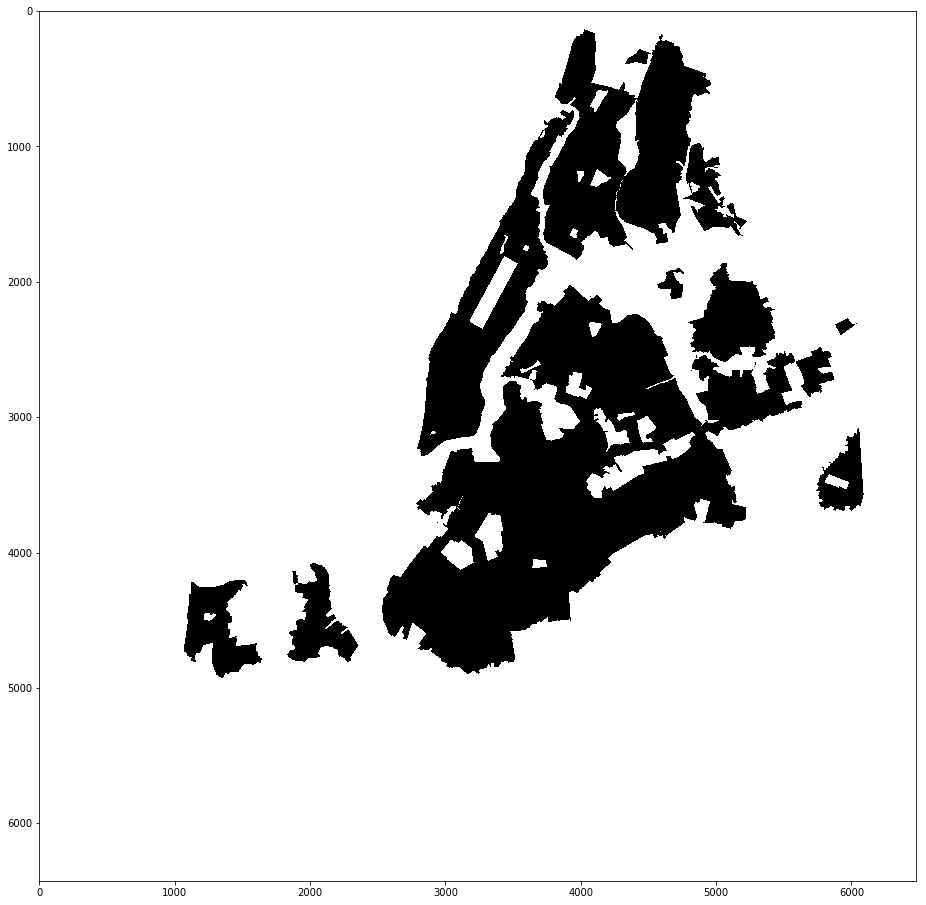

In [102]:
CSarray = plt.imread('Combined_Sewer.tif')
imarrayplot = np.where(CSarray==255, 0, CSarray)
plt.figure(figsize=(16,16))
plt.imshow(imarrayplot, cmap='gray_r')

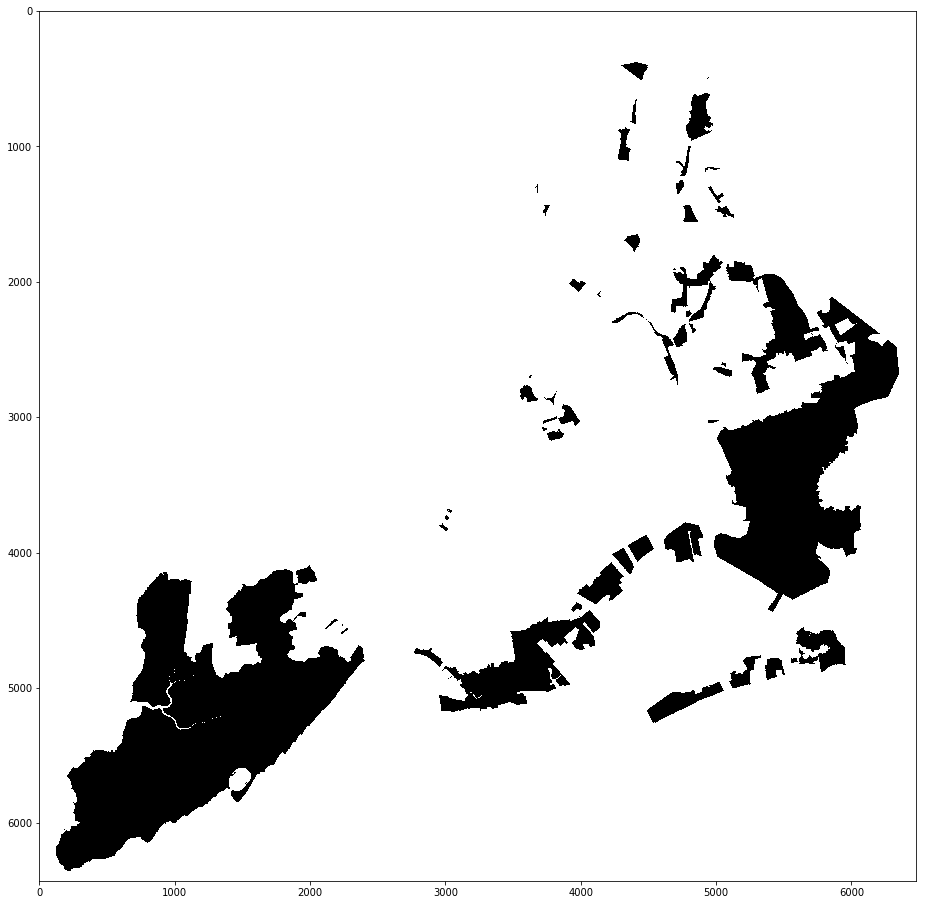

In [105]:
SSarray = plt.imread('Separate_Sewer.tif')
imarrayplot = np.where(SSarray==255, 0, SSarray)
plt.figure(figsize=(16,16))
plt.imshow(imarrayplot, cmap='gray_r')

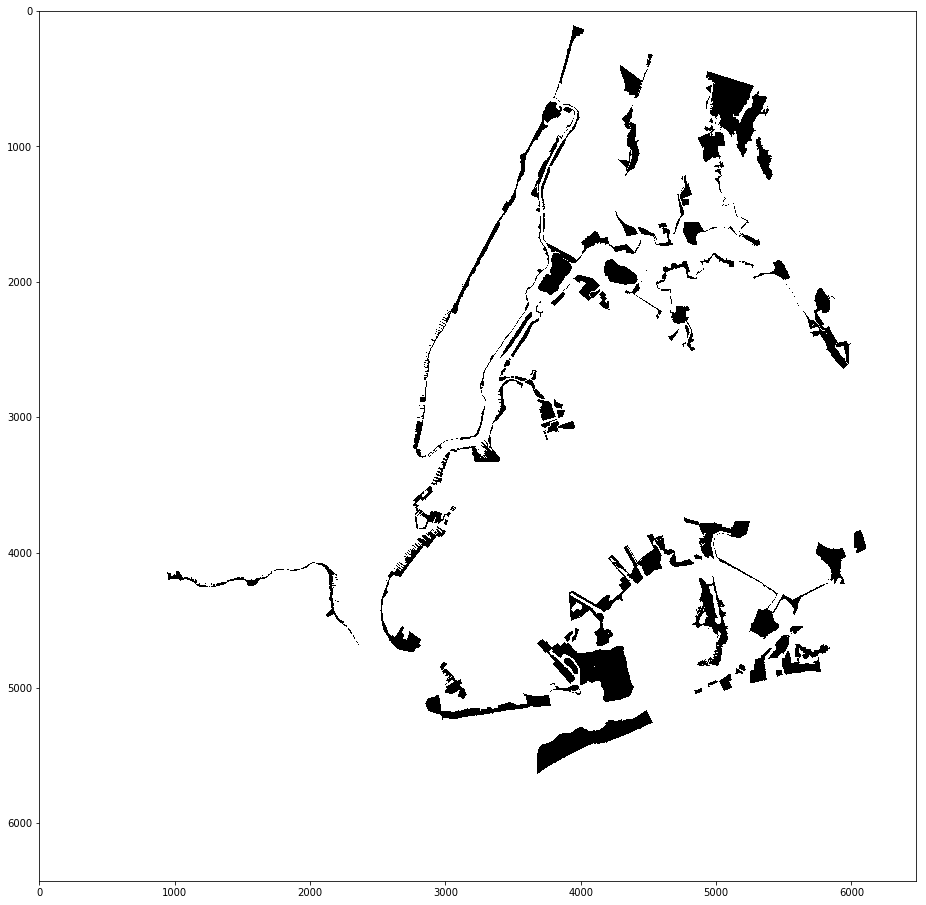

In [103]:
DSarray = plt.imread('Direct_Sewer.tif')
imarrayplot = np.where(DSarray==255, 0, DSarray)
plt.figure(figsize=(16,16))
plt.imshow(imarrayplot, cmap='gray_r')

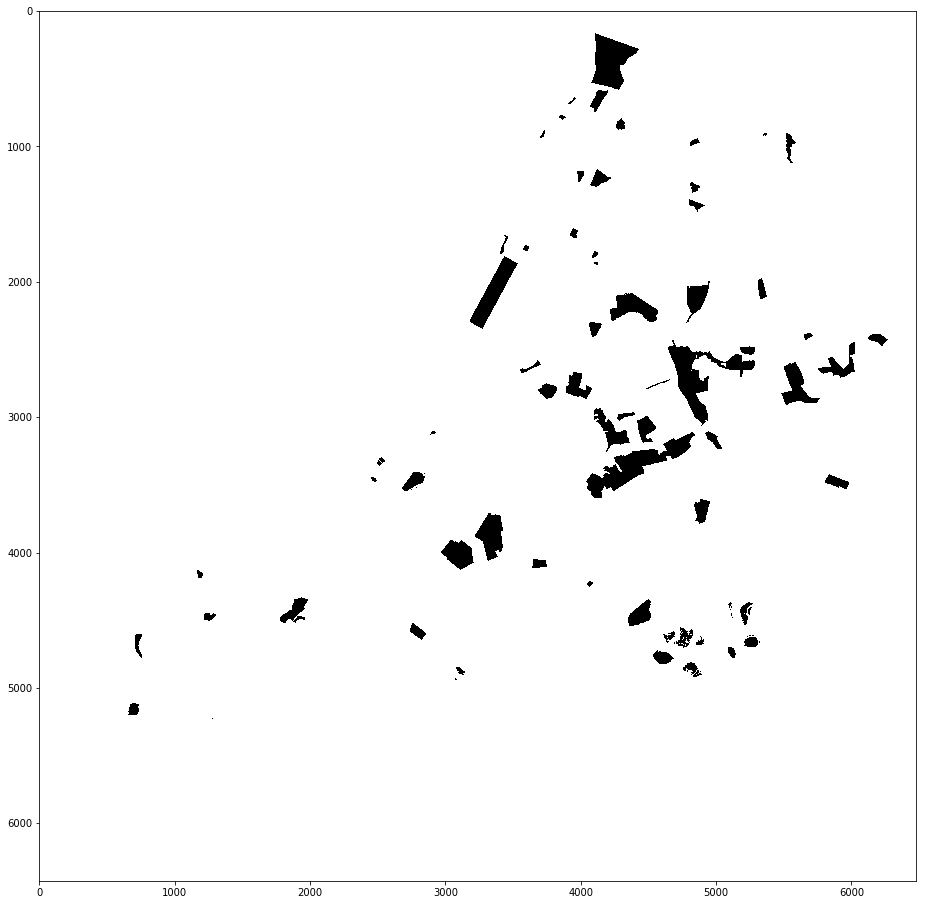

In [104]:
OSarray = plt.imread('Other_Sewer.tif')
imarrayplot = np.where(OSarray==255, 0, OSarray)
plt.figure(figsize=(16,16))
plt.imshow(imarrayplot, cmap='gray_r')

Adapted from https://github.com/perrygeo/pyimpute.

In [2]:
explanatory_rasters = ['Combined_Sewer.tif',
                       'Separate_Sewer.tif',
                       'Other_Sewer.tif',
                       'Direct_Sewer.tif',
                       'NYC_Historical_Water_Bodi.tif',
                       'NYC_Imperviousness.tif',
                       'NYC_Topographic_Wetness.tif']

response_data = 'DEP311.geojson'


train_xs, train_y = load_training_vector(response_data, explanatory_rasters, response_field='classvalue')

/nfshome/rms818/.conda/envs/myEnv/lib/python2.7/site-packages/rasterstats/main.py:145: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/nfshome/rms818/.conda/envs/myEnv/lib/python2.7/site-packages/rasterstats/io.py:248: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)


In [3]:
train_xs = train_xs.astype(float)

In [4]:
test = np.array(train_xs)
np.argwhere(np.isnan(test))

array([[778,   5]])

In [5]:
test[778]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
               nan, 23.91840172])

In [6]:
train_xs_new = np.delete(train_xs, [778], axis=0)
train_y_new = np.delete(train_y, [778], axis=0)
print(train_xs_new.shape)
print(train_y_new.shape)

(819, 7)
(819,)


In [7]:
OCC = OneClassSVM(degree=7, kernel='rbf')
OCC.fit(train_xs_new, train_y_new)

/nfshome/rms818/.conda/envs/myEnv/lib/python2.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=7, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [8]:
pred_y = OCC.predict(train_xs_new)
unique, counts = np.unique(pred_y, return_counts=True)
print(unique)
print(counts)

[-1  1]
[430 389]


In [9]:
target_xs, raster_info = load_targets(explanatory_rasters)

In [10]:
LP= LabelPropagation(kernel='rbf')
LP.fit(train_xs_new, train_y_new)

LabelPropagation(alpha=None, gamma=20, kernel='rbf', max_iter=1000,
         n_jobs=None, n_neighbors=7, tol=0.001)

In [11]:
LP.score(train_xs_new, train_y_new)

1.0

In [12]:
LP_pred = LP.predict(train_xs_new)
unique, counts = np.unique(LP_pred, return_counts=True)
print(unique)
print(counts)

[1]
[819]


In [118]:
imageArrays = CSarray, SSarray, OSarray, DSarray, HWBarray, IMParray, TWIarray
for arr in imageArrays:
    print(arr.shape)

(6426, 6474)
(6426, 6474)
(6426, 6474)
(6426, 6474)
(6390, 6368)
(9102, 9225)
(6282, 6331, 4)
